### Student Name: Vipul Popat
### Student ID: 18195121

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

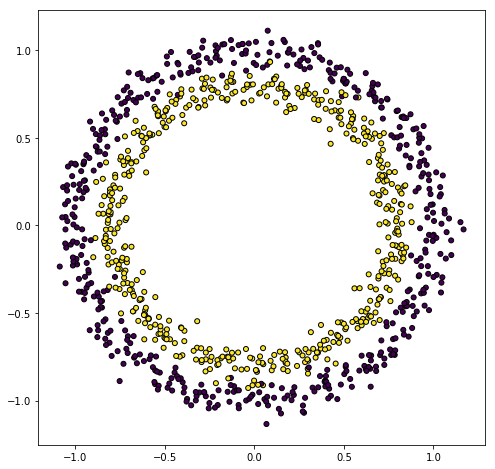

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [4]:
print(X.shape)

(1000, 2)


In [5]:
X

array([[-0.852372  ,  0.11612868],
       [-1.0214141 ,  0.35418616],
       [-0.24950289, -0.70553465],
       ...,
       [-1.04533831,  0.22926988],
       [ 0.67673047, -0.49670023],
       [ 0.29955889,  0.94106941]])

In [6]:
class Perceptron(object):
    """ Perceptron Classifier

    Parameters
    ------------
    rate : float
        Learning rate (ranging from 0.0 to 1.0)
    number_of_iteration : int
        Number of iterations over the input dataset.

    Attributes:
    ------------

    weight_matrix : 1d-array
        Weights after fitting.

    errors_list : list
        Number of misclassification in every epoch(one full training cycle on the training set)

    """

    def __init__(self, rate = 0.01, number_of_iterations = 100):
        self.rate = rate
        self.number_of_iterations = number_of_iterations

    def fit(self, X, y):
        """ Fit training data

        Parameters:
        ------------
        X : array-like, shape = [number_of_samples, number_of_features]
            Training vectors.
        y : array-like, shape = [number_of_samples]
            Target values.

        Returns
        ------------
        self : object

        """

        self.weight_matrix = np.zeros(1 + X.shape[1])
        self.errors_list = []

        for _ in range(self.number_of_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.rate * (target - self.predict(xi))
                self.weight_matrix[1:] += update * xi
                self.weight_matrix[0] += update
                errors += int(update != 0.0)
            self.errors_list.append(errors)
        return self

    def dot_product(self, X):
        """ Calculate the dot product """
        return (np.dot(X, self.weight_matrix[1:]) + self.weight_matrix[0])

    def predict(self, X):
        """ Predicting the label for the input data """
        return np.sign(self.dot_product(X))


In [7]:
p = Perceptron()
p.fit(X, np.array(y))
print("Predicting the output of [-0.75028319, -0.57692659] = {}".format(p.predict([-0.75028319, -0.57692659])))
print("Weight matrix = ", p.weight_matrix)
print("errors_list length = ", len(p.errors_list))
print("errors_list = ", p.errors_list)

Predicting the output of [-0.75028319, -0.57692659] = -1.0
Weight matrix =  [-0.01        0.01695804 -0.00785426]
errors_list length =  100
errors_list =  [512, 520, 530, 528, 520, 500, 504, 518, 508, 508, 504, 510, 505, 519, 506, 512, 510, 506, 512, 516, 510, 506, 520, 506, 520, 510, 512, 508, 506, 522, 508, 522, 528, 520, 506, 512, 532, 508, 516, 504, 504, 528, 510, 506, 494, 520, 506, 512, 532, 508, 516, 504, 504, 528, 510, 516, 510, 506, 510, 508, 520, 510, 502, 516, 518, 512, 514, 506, 520, 506, 504, 526, 526, 512, 516, 508, 508, 512, 510, 522, 528, 520, 526, 516, 502, 512, 510, 522, 500, 506, 524, 506, 518, 512, 516, 512, 510, 524, 506, 506]


### Conclusions
- As seen from the scatter plot above, the data points are not linearly separable. Hence a LinearClassification alogorithm is going to perform very badly in this case.
- The error_list indicates above that only the alogorithm has a very high error rate i.e. 1 out of 2 samples are wrong classified which was expected in any case